<a href="https://colab.research.google.com/github/TutuBraz/metodos_num/blob/main/T3_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho T3 - Aproximação de Funções: 
## Interpolação e ajuste por mínimos quadrados 

### Métodos Numéricos Computacionais - 2º Semestre de 2022

**Curso:**Estatística

**Turma:**

**Nome(s):**Arthur Braz Santos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

**1.** Dada a tabela a seguir, de valores de uma função $f$,

$$
		\begin{array}{cccccccccc}
			\hline
			x   &0.15&  0.17&  0.19&  0.21&  0.23&  0.25&  0.27\\ \hline
			f(x) &0.1761& 0.2304& 0.2788& 0.3222& 0.3617& 0.3979& 0.4314  \\ \hline
		\end{array}
$$

(a) Encontre o polinômio interpolador para os pontos tabelados.

(b) Utilize todos os pontos para estimar $f(0,22)$ por interpolação com a fórmula de lagrange.

(c) Plote o gráfico do polinômio obtido juntamente com os pontos tabelados e o ponto calculado na letra (b) para visualizar o resultado da interpolação.

(d) Escolha 4 pontos e estime $f(0,22)$ utilizando um polinomio de terceiro grau. Plote o gráfico e compare com o resultado do item anterior. Comente.


In [2]:
xi = np.array([0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27], dtype='float')
yi = np.array([0.1761, 0.2304, 0.2788,0.3222,0.3617,0.3979, 0.4314], dtype='float')

In [3]:
#Polinomio interpolador
A = np.array([xi**0,xi**1,xi**2,xi**3,xi**4,xi**5,xi**6]).T
ai = np.linalg.solve(A,yi)
coeffs = np.flipud(ai) # reverte a ordem

print ("Coeficientes:", coeffs)
print (" P(xi):", np.polyval(coeffs,xi))

Coeficientes: [ 2.60416667e+04 -3.30729167e+04  1.73177083e+04 -4.76692708e+03
  7.19283594e+02 -5.30979766e+01  1.49304844e+00]
 P(xi): [0.1761 0.2304 0.2788 0.3222 0.3617 0.3979 0.4314]


In [4]:
#polinomio
y = lambda x: 2.60416667e+04*x**6 -3.30729167e+04*x**5 + 1.73177083e+04*x**4 -4.76692708e+03*x**3 + 7.19283594e+02*x**2 -5.30979766e+01*x + 1.49304844e+00

In [5]:
def calculaPl(x,X,Y):
    valor = 0
    for k in range(len(X)):
        lk = 1.0
        for i in range(len(X)):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor + Y[k]*lk 
    return valor

In [6]:
#F(x)=0.22
f = calculaPl(0.22, xi,yi)
f

0.3423882812499999

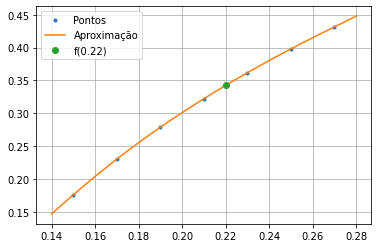

In [7]:
x = np.linspace(0.14,0.28)

fig, ax = plt.subplots()
ax.plot(xi, yi, ".")
ax.plot(x, y(x),'-')
ax.plot(0.22, f, 'o')
ax.legend(['Pontos', 'Aproximação', 'f(0.22)'])
plt.grid()
plt.show();

In [8]:
X = np.array([0.15, 0.17, 0.19, 0.21], dtype='float')
Y = np.array([0.1761, 0.2304, 0.2788,0.3222], dtype='float')

A = np.array([X**0, X**1, X**2, X**3]).T
ai = np.linalg.solve(A,Y)
coeffs = np.flipud(ai) # reverte a ordem

print ("Coeficientes:", coeffs)
print (" P(xi):", np.polyval(coeffs,X))

Coeficientes: [ 18.75       -16.9375       6.693125    -0.51005625]
 P(xi): [0.1761 0.2304 0.2788 0.3222]


In [9]:
f = lambda x: 18.75 *x**3 -16.9375*x**2 +6.693125 *x  -0.51005625

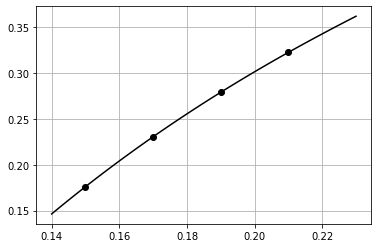

In [10]:
p = np.linspace(0.14,0.23)

plt.plot(X, Y, 'o', p, f(p),'-',color='black')
plt.grid()
plt.show()

In [11]:
f(0.22)

0.34230625000000003

In [12]:
y(0.22)

0.34238823160855336

Por possuirem pontos em comun os polinômios conseguem representar bem os pontos em seu intervalo dos pontos, porém o polinômio de grau 3 não consegue representar com precisão os pontos fora do se intervalo de pontos o que é diferente no polinômio de grau 6.

**2.** 
O volume específico de um vapor superaquecido está listado nas tabelas de vapor para diversas temperaturas. por exemplo, na pressão absoluta de 3000 lb/pol$^2$:

$$
	\begin{array}{cccccc}
			\hline
			T, ^\circ F &700 &720 &740 &760 &780 \\ \hline
			v, pés^3/lb_m &0,0977 &0,12184 &0,14060 &0,15509 &0,16643  \\
			\hline
		\end{array}
$$	

Use interpolação para obter uma tabela que forneça $v$ a cada 5$^\circ$ entre as temperaturas 720$^\circ$ e 760$^\circ$ usando a fórmula de Lagrange e a fórmula de Newton. Compare os resultados e comente o que você observou.

In [13]:
t = np.array([700, 720, 740, 760, 780])
v = np.array([0.0977, 0.12184, 0.14060, 0.15509, 0.16643])

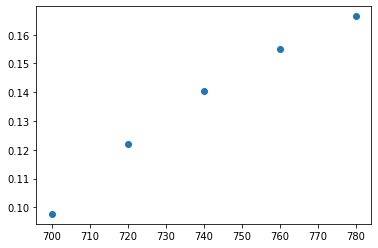

In [14]:
plt.plot(t,v, 'o')

In [15]:
A = np.array([t**0,t**1,t**2,t**3, t**4]).T
ai = np.linalg.solve(A,v)
coeffs = np.flipud(ai) # reverte a ordem

print ("Coeficientes:", coeffs)
print (" P(xi):", np.polyval(coeffs,t))

Coeficientes: [ 2.60416667e-12  1.55208333e-08 -4.83510417e-05  4.26627917e-02
 -1.20231500e+01]
 P(xi): [0.0977  0.12184 0.1406  0.15509 0.16643]


In [16]:
func = lambda x: 2.60416667e-12*x**4 +1.55208333e-08*x**3 -4.83510417e-05*x**2 +4.26627917e-02*x -1.20231500e+01

tl = []
vl = []
for i in range(720, 761, 5):
  tl.append(calculaPl(i, t,v))
  vl.append(i)
print(tl)
print(vl)

[0.12184, 0.1269911865234375, 0.13182335937499998, 0.13635384277343748, 0.1406, 0.1445792333984375, 0.148308984375, 0.15180673339843748, 0.15509]
[720, 725, 730, 735, 740, 745, 750, 755, 760]


In [17]:
# uma função para calcular as diferenças divididas
def difdiv(x,y):
    m = len(x)
    dd = y.copy()
    for k in range(1,m):
        dd[k:m]=(dd[k:m]-dd[k-1])/(x[k:m]-x[k-1])
    return dd

def calculaP(f,xi,x):
    n = len(xi) - 1
    p = f[n]
    for i in range(1,n+1):
        p = f[n-i] + (x -xi[n-i])*p
    return p

In [18]:
ti = np.array([720, 725, 730, 735, 740, 745, 750, 755, 760])
vi = func(ti)

g = difdiv(ti,vi)

In [19]:
# Cria a lista de pontos
xp = np.linspace(720, 760, num=9) 
yp = []
for x in xp:
    y = calculaP(g, xp,x)
    yp.append(y)
yp

[0.12183999517419686,
 0.12699118138760745,
 0.13182335392437672,
 0.13635383700323622,
 0.14059999390542366,
 0.14457922697465797,
 0.14830897761718909,
 0.15180672630173753,
 0.1550899925595406]

In [20]:
tl

[0.12184,
 0.1269911865234375,
 0.13182335937499998,
 0.13635384277343748,
 0.1406,
 0.1445792333984375,
 0.148308984375,
 0.15180673339843748,
 0.15509]

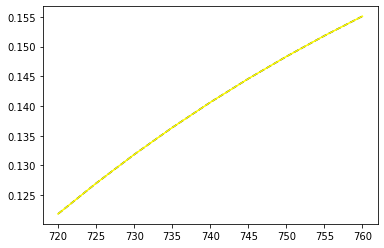

In [21]:
plt.plot(vl,tl, '--',color='black')
plt.plot(xp, yp, color = 'yellow')

In [22]:
vl

[720, 725, 730, 735, 740, 745, 750, 755, 760]

A fórmula de Lagrange e Newton apresentam resultados parecidos, porém com uma diferença no arredondamento por causa dos cálculos feitos pelo computador.

**3.** Considere a função 
$$f(x)=\frac{3.21}{0.73 + 9.81x^2}$$

(a) Aproxime o valor de $f(1.78)$ usando um polinômio interpolador de grau 3 no intervalo [1, 2] e compare com o valor da função. Mostre o gráfico do polinômio e da função nesse intervalo. 

(b) Repita o item anterior, mas dessa vez utilize um polinômio de grau 10 no intervalo [-2,2] e comente o que você observou. 
	
(c) Pesquise e responda o que é "Fenômeno de Runge".


In [23]:
func = lambda x: 3.21/(0.73+9.81*x**2)
xi = np.linspace(1.0, 2.0, num=4)
yi = func(xi)

f = difdiv(xi,yi)
print (f)

[ 0.30455408 -0.38366774  0.29677148 -0.17290692]


In [24]:
#Polinomio interpolador
print ("P(1.78) =", calculaP(f,xi,1.78))

P(1.78) = 0.10186113819231793


In [25]:
#Valor da função
print(func(1.78))

0.10090530605993887


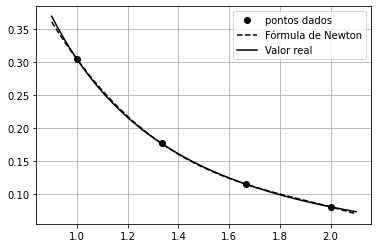

In [26]:
xp = np.linspace(0.9, 2.1)
yp = []

for x in xp:
    yp.append(calculaP(f,xi,x))

plt.plot(xi, yi, "ro", 
         xp, yp, "--",
         xp, func(xp),"-",
         color='black')
plt.legend(['pontos dados', 'Fórmula de Newton', 'Valor real'])
plt.grid()
plt.show()

Podemos vizulizar que conseguimos um valor muito próximo ao valor real da função no pontos dados, porém por ser uma aproximação sempre será uma valor muito próximo.

P(1.78) Newton = -1.1070765436161314
P(1.78) Real = 0.10090530605993887


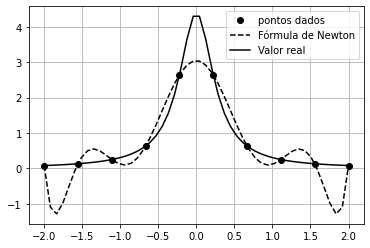

In [27]:
xi = np.linspace(-2.0, 2.0, num=10)
yi = func(xi)

f = difdiv(xi,yi)

xp = np.linspace(-2., 2.)
yp = []

for x in xp:
    yp.append(calculaP(f,xi,x))

print("P(1.78) Newton =", calculaP(f,xi,1.78))
print('P(1.78) Real =',func(1.78))

plt.plot(xi, yi, "ro", 
         xp, yp, "--",
         xp, func(xp),"-",
         color='black')
plt.legend(['pontos dados', 'Fórmula de Newton', 'Valor real'])
plt.grid()
plt.show()

Podemos obeservar que com o aumento do grau do polinomio interpolador os valores se tornaram imprecisos. O que pode evidenciado através dos valores do gráfico e também do valor da imagem para x = 1.78 que apresentam valores totalmente diferentes.

O fenômeno de Runge é um problema de oscilação nas bordas de um intervalo, que ocorre quando se usa interpolação polinomial com polinómios de ordem elevada.

**4.** Após serem efetuadas medições num gerador de corrente contínua, foram obtidos os seguintes
valores indicados por um voltímetro e um amperímetro.

$$
\begin{array}{ccccccccccccc}
    \hline
I(A) &1.58& 1.75& 2.10& 2.20& 2.50& 3.50& 3.75& 4.25& 4.50& 4.90& 3.12    \\ \hline
V(v) &210& 165& 154& 120& 85& 50& 73& 76& 110& 128& 60		  \\
\hline
\end{array}
$$

Faça um gráfico dos dados.

(a) Ajuste um polinômio de grau adequado aos dados por mínimos quadrados. 

(b) Estime o valor a ser obtido no voltímetro quando o amperímetro estiver marcando $4.0A$.

(c) Plote o polinômio e os pontos.

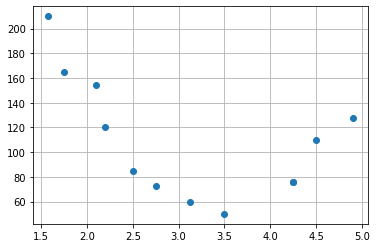

In [28]:
X = np.array([1.58, 1.75, 2.10, 2.20, 2.50, 3.50, 2.75, 4.25, 4.25, 4.50, 4.90, 3.12])
Y = np.array([210, 165, 154, 120, 85, 50, 73, 76, 76, 110, 128, 60]) 

plt.plot(X, Y, "o")
plt.grid()
plt.show()

In [29]:
V = np.array([X**2, X**1, X**0]).T
A  = np.dot(V.T, V)
A

array([[2038.60998132,  501.18614   ,  130.9908    ],
       [ 501.18614   ,  130.9908    ,   37.4       ],
       [ 130.9908    ,   37.4       ,   12.        ]])

In [30]:
B =np.dot(V.T, Y)
B

array([12615.653,  3751.6  ,  1307.   ])

In [31]:
a = np.linalg.solve(A,B)
a

array([  41.65417181, -290.61700608,  559.9802282 ])

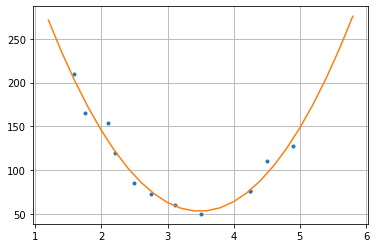

In [32]:
Xr = np.arange(1.2,6,0.2)
def g(x):
    return a[0]*x**2 + a[1]*x + a[2]

plt.plot(X, Y, ".", Xr, g(Xr),'-')
plt.grid()
plt.show()

In [33]:
#quando o amperímetro estiver marcando 4
valor = g(4)
valor

63.978952871732304

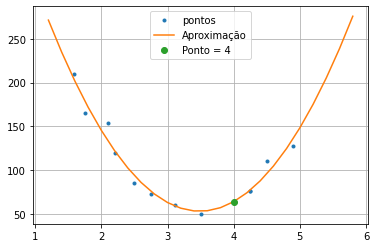

In [34]:
fig, ax = plt.subplots()
ax.plot(X, Y, ".", Xr, g(Xr),'-')
ax.plot(4, valor, 'o')
ax.legend(['pontos','Aproximação','Ponto = 4'])
plt.grid()
plt.show();

**5.** Dados a seguinte tabela use mínimos quadrados para

$$
\begin{array}{cccccccccc}
\hline
x_i    &0.01  &0.99  &2.02  &3.01  &3.97  &5.01  &5.93  &6.99  &8.08  \\
\hline
f(x_i) &0.000 &1.621  &1.782  &0.915 &-0.122 &-0.225 &1.099 &2.728 &3.534\\
\hline
\end{array}
$$

(a) Encontrar o polinômio de 3 que melhor se ajusta aos pontos dados.

(b) Agora encontre a função do tipo $g(x)=a_1x + a_2 sen(x)$ que melhor se ajusta. 

(c) Plote os gráficos e decida qual das duas funções acima é a melhor escola para estimar $f(11.5)$. Jusfifique sua resposta.


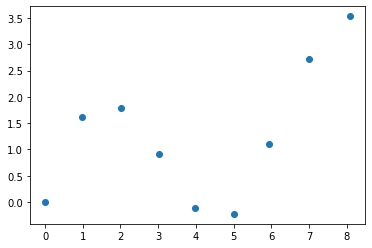

In [35]:
xi = np.array([0.01,0.99, 2.02, 3.01, 3.97, 5.01,5.93, 6.99, 8.08])
yi = np.array([0.000,1.621, 1.782, 0.915, -0.122, -0.225, 1.099, 2.728, 3.532])
plt.plot(xi, yi, 'o')

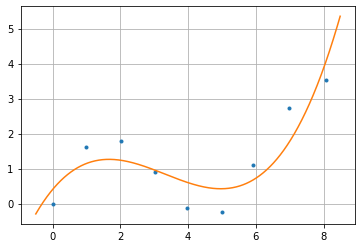

In [36]:
U = np.array([xi**3, xi**2, xi**1, xi**0]).T
C = np.dot(U.T, U)
D = np.dot(U.T, yi)
d = np.linalg.solve(C,D)
Xr = np.arange(-0.5,8.5,0.01)


def h(x):
    return d[0]*x**3 + d[1]*x**2 + d[2]*x + d[3]

plt.plot(xi, yi, ".", Xr, h(Xr),'-')
plt.grid()
plt.show()

In [38]:
#Função de grau 3
print(f'f(x) = {d[0]}*x**3 + {d[1]}*x**2 + {d[2]}*x + {d[3]}')

f(x) = 0.04673682792824189*x**3 + -0.46468460448876925*x**2 + 1.1584868280454674*x + 0.4084044475875761


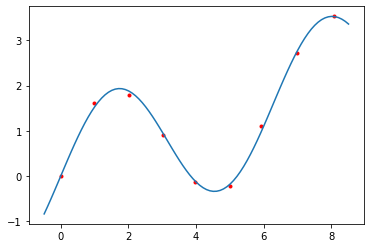

In [39]:
g1 = lambda x: x
g2 = lambda x: np.sin(x)

a11 = np.sum(np.multiply(g1(xi),g1(xi)))
a12 = np.sum(np.multiply(g1(xi),g2(xi)))
a21 = a12
a22 = np.sum(np.multiply(g2(xi),g2(xi)))


A = np.array([[a11, a12],[a21, a22]])

b1 = np.sum(np.multiply(yi,g1(xi)))
b2 = np.sum(np.multiply(yi,g2(xi)))
B = np.array([b1,b2])

a = solve(A, B)

g = lambda x: a[0]*g1(x)+a[1]*g2(x)

Xs = np.arange(xi[0]-0.5, xi[-1]+0.5, 0.1)
Ys = g(Xs)  

plt.plot(xi, yi, "r.", Xs, Ys, "-")
plt.show()

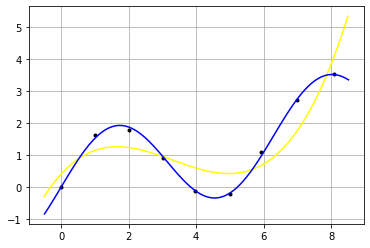

In [40]:
plt.plot(xi, yi, ".",color='black')
plt.plot(Xr, h(Xr),'-', color='yellow')
plt.plot(Xs,Ys,color='blue')

plt.grid()
plt.show()

In [41]:
g(11.5)

1.5941010865774565

In [42]:
h(11.5)

23.357337201835602

Acredito que a função g(x)=ax+bsen(x) é a melhor escolha para estimar a imagem do ponto 11.5 devido a uma melhor precisão no pontos dados pela questão.